### Libreria

In [2]:
# Data manipulation
import pandas as pd

# Graph 
import geopandas
from matplotlib import pyplot as plt

# Import data
import urllib.request, json 

Datos de INEGI.

El banco de indicadores economicos ofrece datos que nos permite conocer el comportamiento de la economia dentro de México como conjunto y separado por Estados. 

#### datos de geopandas por entidad federativa

In [3]:
geo_df = geopandas.read_file("https://gist.githubusercontent.com/walkerke/76cb8cc5f949432f9555/raw/363c297ce82a4dcb9bdf003d82aa4f64bc695cf1/mx.geojson")

### Indicadores economicos

* Producto Interno Bruto a precios de mercado

In [56]:
# Se crea un dataframe vacio
df_states = pd.DataFrame()

# Se extrae los valores para cada Estado
for state, name_state in zip(range(746098,746129 +1), list(geo_df["state"])):
    with urllib.request.urlopen(f'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/746098/es/0700/false/BIE/2.0/{inegi_token}?type=json') as url:
        data = json.load(url)
        df = pd.json_normalize(data["Series"], "OBSERVATIONS").rename(columns={"OBS_VALUE":"PIB", "COBER_GEO":"state"})
        df["state"] = name_state
        df_states = pd.concat([df_states, df])

### Se une los de PIB a los valores de geopandas

In [92]:
df_pib = geo_df.merge(df_states[["TIME_PERIOD", "PIB", "state"]], on="state")

# Change dtype from couple columns
df_pib = df_pib.astype({"TIME_PERIOD": "int32", "PIB":"float", "state":"object"})

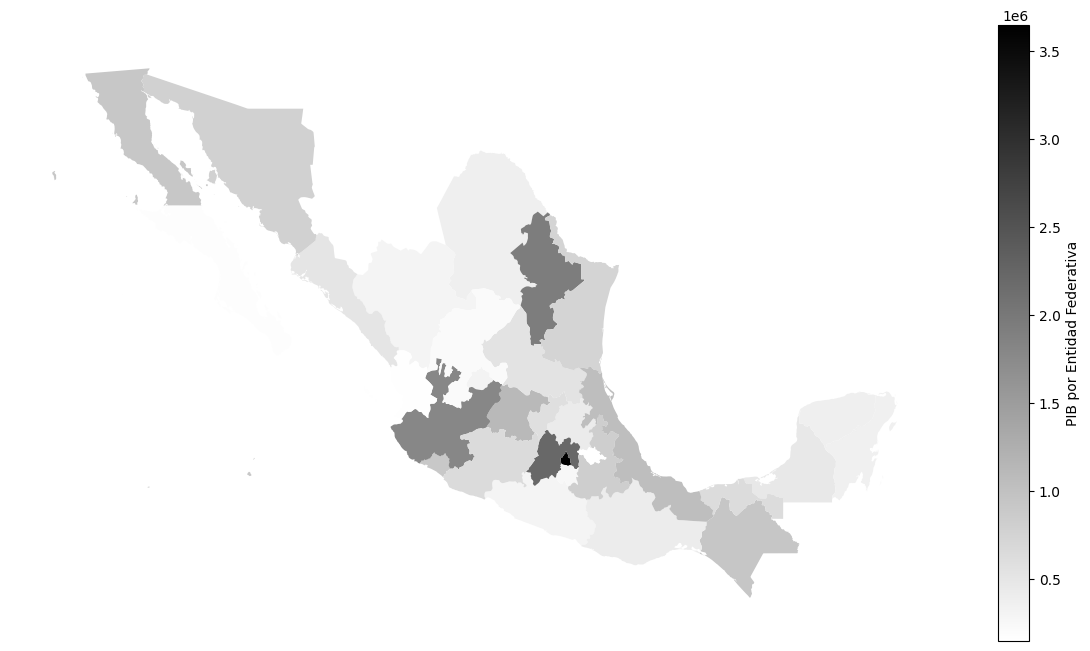

In [115]:
## Producto Interno Bruto por Entindad Federativa
ax = df_pib.loc[df_pib["TIME_PERIOD"] == 2022].plot(column="PIB",
                                                figsize=(15, 8),
                                                legend=True,
                                                legend_kwds={"label": "PIB por Entidad Federativa", "orientation": "vertical"},
                                                cmap='binary')
# Se grafica 
ax.set_axis_off();